In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download andrewmvd/pediatric-pneumonia-chest-xray

 99% 1.13G/1.14G [00:13<00:00, 77.9MB/s]
100% 1.14G/1.14G [00:13<00:00, 91.5MB/s]


In [ ]:
!unzip pediatric-pneumonia-chest-xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0435-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0438-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0440-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0441-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0442-

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64
data_dir = "/content/Pediatric Chest X-ray Pneumonia"

In [ ]:
import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 5232 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
class_names

['NORMAL', 'PNEUMONIA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


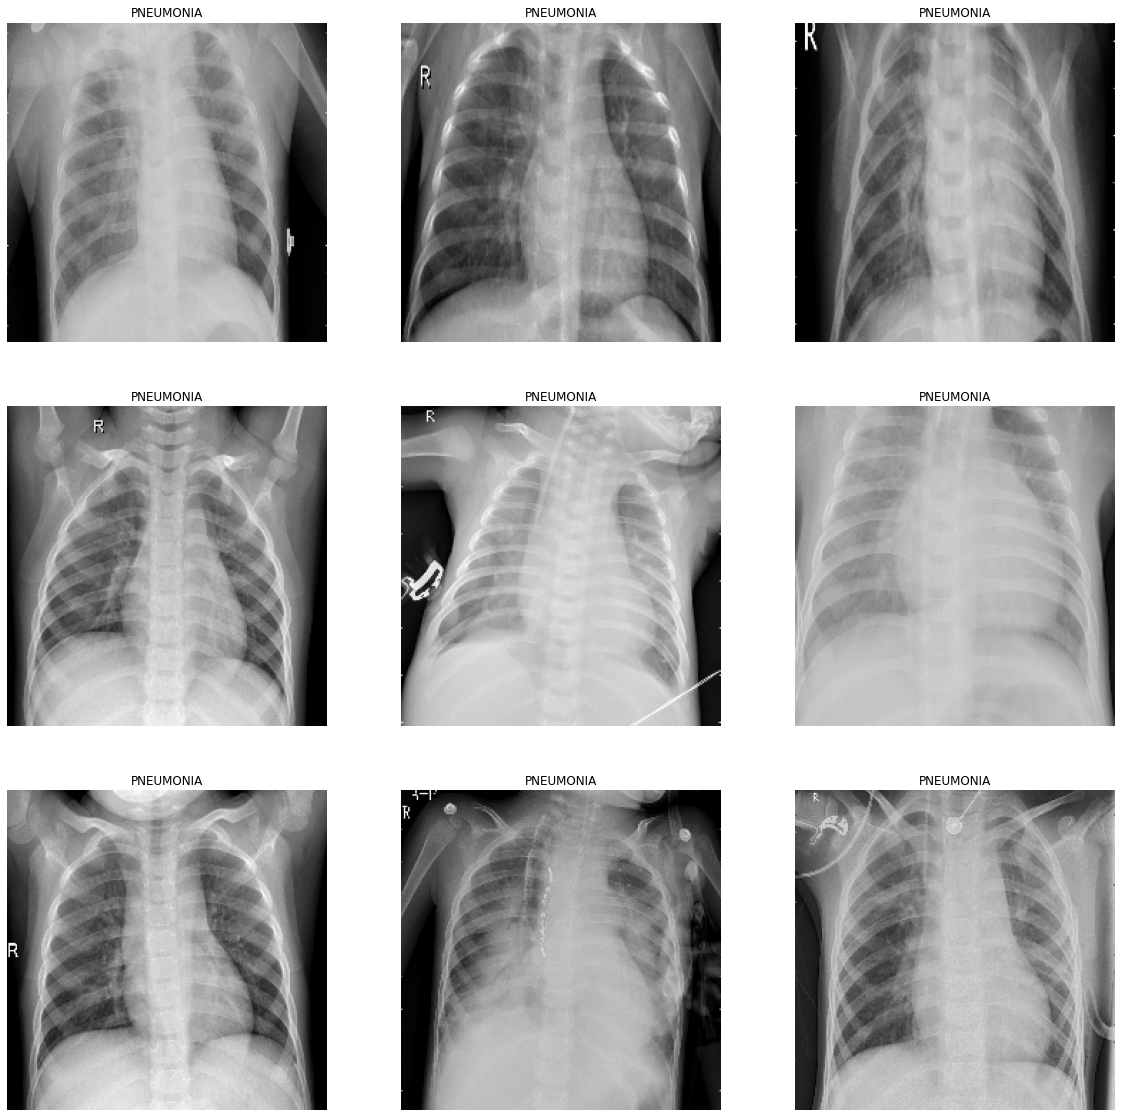

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in train_dataset.take(4):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[0]])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
TFHub_Model ="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
  hub.KerasLayer(TFHub_Model, trainable=True),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9),
  loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(
    train_dataset,
    epochs=5).history

Epoch 1/5
82/82 [==============================] - 1067s 13s/step - loss: 0.3806 - accuracy: 0.9492
Epoch 2/5
82/82 [==============================] - 1059s 13s/step - loss: 0.3140 - accuracy: 0.9904
Epoch 3/5
82/82 [==============================] - 1075s 13s/step - loss: 0.3015 - accuracy: 0.9971
Epoch 4/5
82/82 [==============================] - 1072s 13s/step - loss: 0.2945 - accuracy: 0.9990
Epoch 5/5
82/82 [==============================] - 1085s 13s/step - loss: 0.2911 - accuracy: 1.0000


In [ ]:
hist

{'accuracy': [0.9491590261459351,
  0.9904434084892273,
  0.9971330165863037,
  0.9990443587303162,
  1.0],
 'loss': [0.38057446479797363,
  0.31402847170829773,
  0.3015289604663849,
  0.2945420742034912,
  0.29112616181373596]}

In [ ]:
model.evaluate(test_dataset)

10/10 [==============================] - 18s 2s/step - loss: 0.6970 - accuracy: 0.7772


[0.6970183253288269, 0.7772436141967773]